# Pymaceuticals Inc.
---

### Analysis

 Scatterplot shows that the heavier the mouse the less effective the drug is. 
 On average Capomulin was effective in decreasing the tumor volume (size) from 45mm to 38mm (see Lineplot).

 The results of the study are reliable, because there is only one outlier in the data (in Infubinol Drug).
 
 A high positive correlation coefficient (close to 1) between mouse weight and average tumor volume  (0.8419363424694718) suggests a strong linear relationship between the two variables, meaning that as mouse weight  increases, the average tumor volume is likely to increase as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem


# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
print(df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of unique mice IDs.
unique_mice = df['Mouse ID'].nunique()
print('Number of unique mice IDs:', unique_mice)

Number of unique mice IDs: 249


In [3]:
# Check for duplicate time points for a mouse ID
duplicate_mouse = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mouse_data = df[duplicate_mouse]
print('Data associated with duplicate time points:')
print(duplicate_mouse_data)

Data associated with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801        

In [4]:
# Create a new DataFrame without the duplicated data
df_clean = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [5]:
# Updated number of unique mice IDs
unique_mice_clean = df_clean['Mouse ID'].nunique()
print('Updated number of unique mice IDs:', unique_mice_clean)

Updated number of unique mice IDs: 249


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[duplicate_mouse].drop_duplicates(subset=["Mouse ID", "Timepoint"])["Mouse ID"].unique()
print(f"Duplicate mice: {duplicate_mice}")

Duplicate mice: ['g989']


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = df_clean.loc[df_clean["Mouse ID"].isin(duplicate_mice)]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
910           48.786801                 0  
912           51.745156                 0  
914           51.325852                 1  
916           55.326122                 1  
918           56.045564                 1  
919           59.082294                 1  

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = df_clean.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [13]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_data["Mouse ID"].nunique()
print(f"Number of mice in the clean DataFrame: {unique_mice_clean}")

Number of mice in the clean DataFrame: 249


In [15]:
#Checking if the duplicate mice were removed
print("Combined Data Shape:", df.shape)
print("Clean Data Shape:", clean_data.shape)

if unique_mice > unique_mice_clean:
    print("Duplicate mice were removed")
    print(f"Number of mice before cleaning: {unique_mice}")
    print(f"Number of mice after cleaning: {unique_mice_clean}")
else:
    print("No duplicate mice were found")

Combined Data Shape: (1893, 8)
Clean Data Shape: (1888, 8)
No duplicate mice were found


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df = df_clean.groupby(['Drug Regimen'])


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics = grouped_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', sem]})
print('Summary Statistics:')
print(summary_statistics)

Summary Statistics:
             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

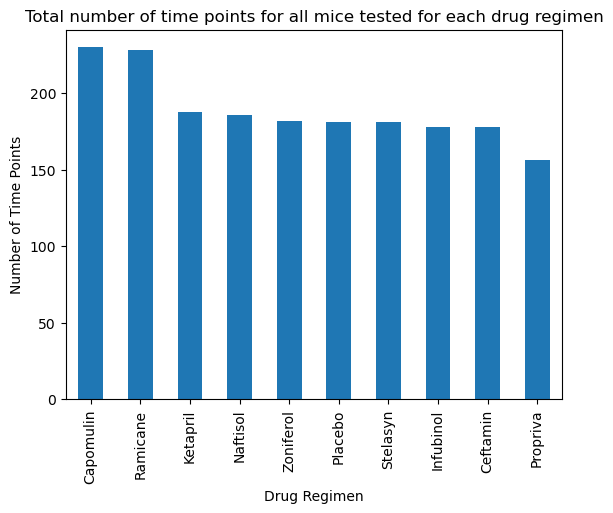

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

df_clean['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Total number of time points for all mice tested for each drug regimen')
plt.show()

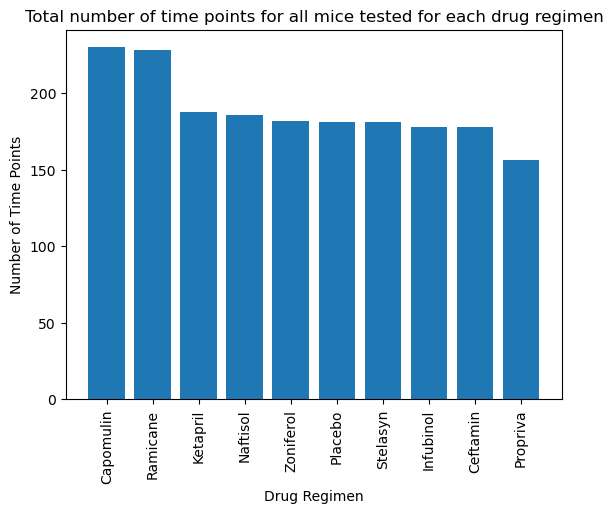

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimens = df_clean['Drug Regimen'].value_counts().index
time_points = df_clean['Drug Regimen'].value_counts().values
plt.bar(regimens, time_points)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Total number of time points for all mice tested for each drug regimen')
plt.xticks(rotation=90)
plt.show()

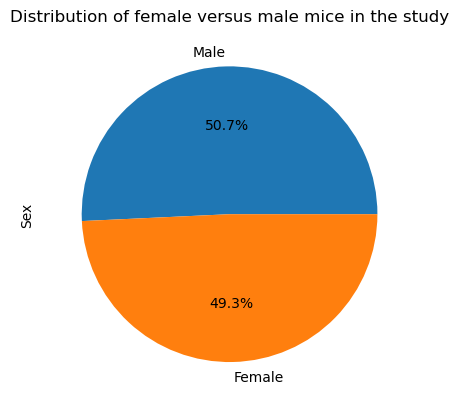

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df_clean['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of female versus male mice in the study')
plt.show()

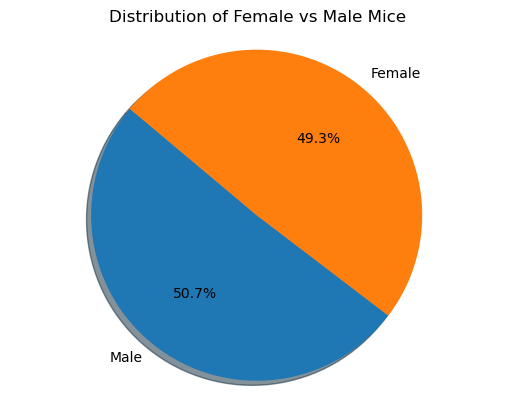

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = df_clean['Sex'].value_counts().values
labels = df_clean['Sex'].value_counts().index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped_df = df_clean.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
grouped_df = grouped_df.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df, df_clean, on=["Drug Regimen", "Mouse ID", "Timepoint"])

Outliers for Capomulin : []
Outliers for Ramicane : []
Outliers for Infubinol : [36.3213458]
Outliers for Ceftamin : []


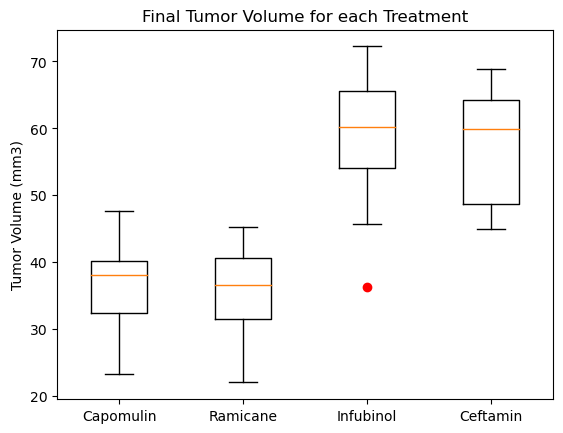

In [24]:
# Create a list of treatment names and an empty list to hold tumor volume data
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_list = []

# Loop through each drug in the treatment list
for drug in treatment_list:
    treatment_df = merged_df[merged_df["Drug Regimen"] == drug]
    tumor_volume_list.append(treatment_df["Tumor Volume (mm3)"])

for i, volume_data in enumerate(tumor_volume_list):
    quartiles = volume_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume_data[(volume_data < lower_bound) | (volume_data > upper_bound)]
    print(f"Outliers for {treatment_list[i]} : {outliers.values}")

# Generate a box plot using Matplotlib
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for each Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_list, labels=treatment_list, flierprops={"markerfacecolor":"red", "markeredgecolor":"red"})
plt.show()

## Line and Scatter Plots

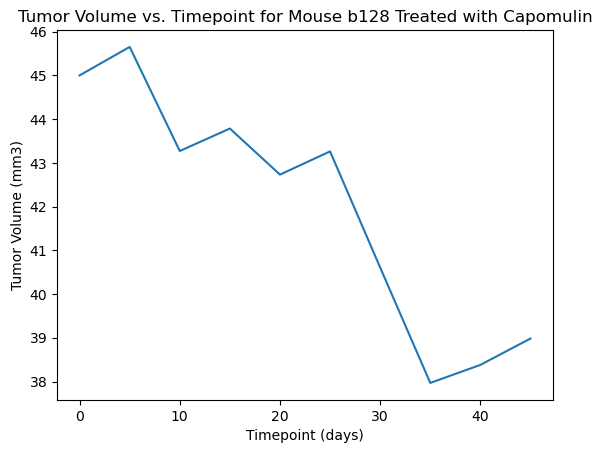

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "b128"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Add labels and title to the plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for Mouse b128 Treated with Capomulin")

plt.show()

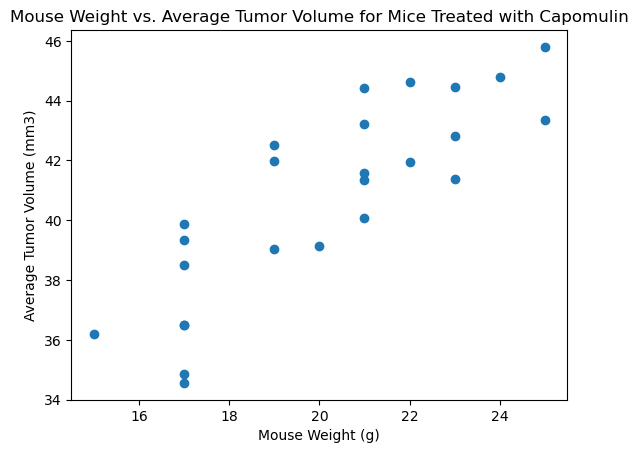

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mean_tumor_volume = capomulin_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
mouse_weight = capomulin_data.groupby("Mouse ID").mean()["Weight (g)"]

plt.scatter(mouse_weight, mean_tumor_volume)

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Mice Treated with Capomulin")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694718


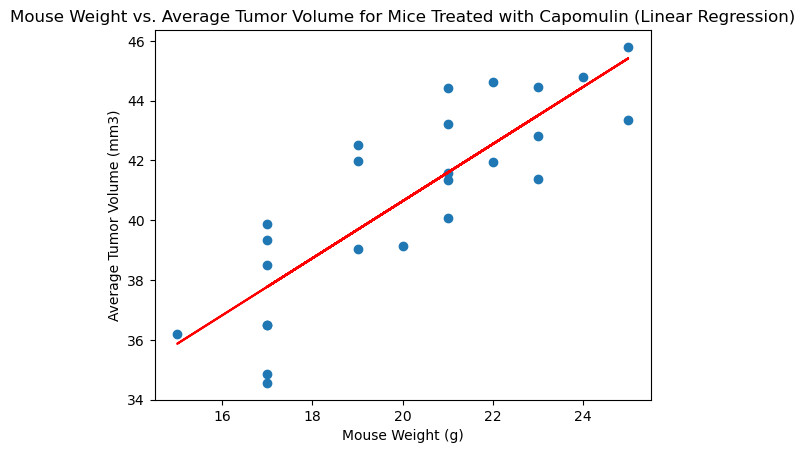

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, mean_tumor_volume)
print("The correlation coefficient between mouse weight and average tumor volume is", correlation[0])

# Perform a linear regression on the mouse weight and average tumor volume data
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, mean_tumor_volume)

# Create a line using the calculated regression values
regression_line = mouse_weight * slope + intercept

# Add the regression line to the scatter plot
plt.scatter(mouse_weight, mean_tumor_volume)
plt.plot(mouse_weight, regression_line, "r-")


plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Mice Treated with Capomulin (Linear Regression)")
plt.show()